Review:

In the `unsupervised learning`, we have 2 types of problems:
- 1) `Clustering` : identity the unknown data
- 2) `Dimensionality reduction`: use structural characteristics to simplify data.

`unsupervised learning overview:` 
- Step 1) `fit "unlabeled data" to a "structure" = "model"` 
- Step 2) using the created model to `predict` the `new unlabeled data`

In [1]:
from sklearn.cluster import KMeans

**Motivation & idea of clustering** Finding a `distinct group` 
- `KMeans` or `K-means clustering` is a type of `unsupervised learning`, which is used when you have `unlabeled outcome` (i.e., data without defined `categories` or `groups`). 
- The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable `K`. The algorithm works iteratively to assign each data point to one of `K` groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the `K-means clustering algorithm` are:

- - 1) The centroids of the K clusters, which can be used to label new data

- - 2) Labels for the training data (each data point is assigned to a single cluster)

**`Mathematical model`** Suppose that there are $N$ `data points` in $\mathbb{R}^d$; let $\mathbf{X} = (\mathbf{x_1}, \ldots, \mathbf{x_N})$ in $\mathbb{R}^{d \times N}$ and $K < N$ be the `number of clusters`. We want to determine :
- 1) the `centers` $m_1, \ldots, m_K$ and 
- 2) the `label vectors`, denoted $\textbf{y}_{k} = (y_{k1}, \ldots, y_{kK})$ for $k \in 1, \ldots, K$  is the label of the cluster $k^{th}$. For instance, if a datapoint $x_i$ belongs to the cluster $k$ then the coordinate $y_{kj} = \delta_{j k}$ (the `Kronecker delta`) for all $j, k \in 1, \ldots, K.$ Hence,
$$ \sum_{j=1}^K y_{i j} = 1, \quad \forall i \in 1, \ldots, N. $$

- **Loss function** For $\textbf{Y} = \left( \textbf{y}_1, \ldots, \textbf{y}_N \right)$ and $\textbf{M} = \left( \textbf{m}_1, \ldots, \textbf{m}_K \right)$, define
$$ L(\textbf{Y}, \textbf{M}) = \sum_{i = 1}^N \sum_{j=1}^K y_{i j} \Vert x_i - m_j \Vert^2 $$
be the `loss function` and $\Vert . \Vert$ be the `standard (L2) Euclide distance`; hence we have to optimize the following problem.
$$ (\textbf{Y}^{*}, \textbf{M}^{*}) = \underset{\textbf{Y, M}}{\text{argmin}} L(\textbf{Y, M})$$
where
$$ \sum_{j=1}^K y_{ij} = 1, \forall i \text{ and } y_{i j} \in \lbrace 0 , 1 \rbrace , \quad \forall i, j.$$

**`How to find the centers and the label vectors`**
- **1) Find Y (label), for fixed M (center)** Assume that we have found the `centers`, then determine the `label vectors` to minimize the loss function,
$$ \textbf{y}_i^{*} = \underset{ \textbf{y}_i \in \textbf{Y}}{\text{argmin}} \sum_{j=1}^K y_{i j} \Vert x_i - m_j \Vert^2, $$
by the condition on the `label vector`, we obtain
$$ j^{*} = \underset{1 \leq j \leq K}{\text{argmin}} \Vert x_i - m_j \Vert^2 $$

- **2) Find M, for fixed Y** Now, suppose we found the label vectors, then 
$$ \textbf{m}_j^{*} = \underset{ \textbf{m}_j \in \textbf{M}}{\text{argmin}} \sum_{i=1}^N y_{i j} \Vert x_i - m_j \Vert^2 $$
and hence, we get
$$ \textbf{m}_j^{*} = \dfrac{\sum_{i=1}^N y_{i j} \textbf{x}_{i} }{\sum_{i=1}^N y_{i j } } $$

**Example 1.** Let $N = 999,$ and $K = 3$. First, we will try to re-build the algorithm to find the `centers` and `label vectors`? In the first example, we will create 3 discrete clusters to check this algorithm

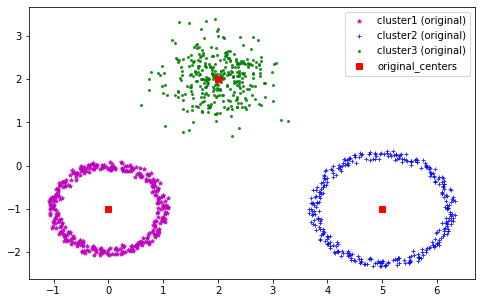

In [2]:
## create data point on R2

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-np.pi, np.pi, 333)

## create the first cluster is the circle centered at (0, 2); random_noise ~ uniform(-0.1, 0.1)
X1 = np.zeros([333, 2])
X1[:, 0] = np.sin(t) + np.random.uniform(-0.1, 0.1, 333)
X1[:, 1] = -1 + np.cos(t) + np.random.uniform(-0.1, 0.1, 333)

## create the second cluster is the circle centered at (4, 1), radius = 1.5; random_noise ~ uniform(-0.5, 0.3)
X2 = np.zeros([333, 2])
X2[:, 0] = 5 + 1.25*np.sin(t) + np.random.uniform(-0.1, 0.1, 333)
X2[:, 1] = -1 + 1.25*np.cos(t) + np.random.uniform(-0.1, 0.1, 333)

## The 3 rd cluster shaped the bi-normal distribution with means = [2, 2] & matrix_covariance = [[0.25, 0], [0, .25]]
X3 = np.random.multivariate_normal([2, 2], [[0.25, 0], [0, 0.25]], 333)

## merge X1, X2, X3 to the data X and we will use X in the function KMeans to predict label & center
X = np.concatenate((X1, X2, X3), axis = 0)

## real centers
M_real = np.array([[0, -1], [5, -1], [2, 2]])

## display the data in cluster
plt.figure(figsize = (8, 5))
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b+', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.legend()
plt.show()

Based on the `constructed_dataset`; we want to get the centers be `(0, -1), (5, -1), (2, 2)`

Now, apply the function **`KMeans` to predict the centers and the corresponding labels**

original centers:
[[ 0 -1]
 [ 5 -1]
 [ 2  2]]
Centers found by scikit-learn:
[[-3.25702835e-03 -1.00005097e+00]
 [ 5.00428293e+00 -1.00755773e+00]
 [ 1.99726868e+00  2.02675803e+00]]


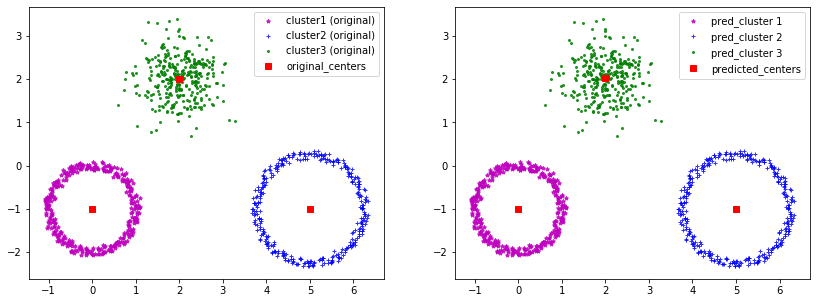

In [3]:
kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000).fit(X)

## centers of each cluster
M_pred = kmeans.cluster_centers_
## assign the cluster using the predicted label 
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 0 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 0 (predicted cluster 3 rd)

print('original centers:')
print(M_real)
print('Centers found by scikit-learn:')
print(M_pred)

## real
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b+', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.legend()

## predicted 
plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'm*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'b+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'g.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.legend()

plt.show()

By the results of the found centers, they approximate (0, 1); (5, -1) and (2, 2) with the errors is about e-03

In [4]:
from scipy.spatial.distance import cdist

loss = (np.diag(cdist(M_pred, M_real))**2).sum()
print(loss)

inet = kmeans.inertia_
print(inet)

0.0008095260733225715
1007.2117693704191


***predict new unlabled_data***

predict the labels of the new data-points:
[0 1 2]


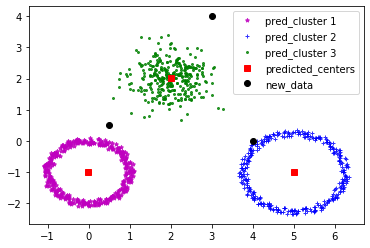

In [5]:
new_data = np.array([[0.5, 0.5], [4, 0], [3, 4]])
print('predict the labels of the new data-points:')
print(kmeans.predict(new_data))

plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'm*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'b+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'g.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.plot(new_data[:, 0], new_data[:, 1], 'ko', label = 'new_data')
plt.legend()
plt.show()

The first datapoint (0.5, 0.5) is in `cluster1(class 0, red)`; the second (4, 0) is in `cluster2(green)` and the last (3, 4) is in `cluster3(blue)`

For instance, the first new_data is `nearer` the cluster1 `than` the cluster2; the third new_data is on the boundary of the cluster3.

Now, we use the dataset with the distance of each cluster is small and there are not much overlap datapoints 

**Example 2.** Predict the cluster when the dataset be the `bi-normal distributions`.

original centers:
[[2.  2.5]
 [8.  3. ]
 [3.  6. ]]
Centers found by scikit-learn:
[[1.96061784 2.51794856]
 [7.89693144 3.00864889]
 [3.10011182 6.12230879]]
predict the labels of the new data-points:
[0 2 1]


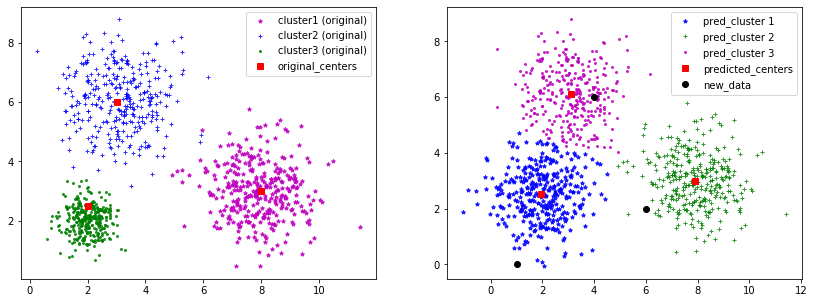

In [6]:
means = [[2, 2.5], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 333
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)

kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000).fit(X)

## change the centers
M_real = np.array(means)

## centers of each cluster
M_pred = kmeans.cluster_centers_
## assign the cluster using the predicted label 
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 0 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 0 (predicted cluster 3 rd)

print('original centers:')
print(M_real)
print('Centers found by scikit-learn:')
print(M_pred)

## change the new data
new_data = np.array([[1, 0], [4, 6], [6, 2]])
print('predict the labels of the new data-points:')
print(kmeans.predict(new_data))

plt.figure(figsize = (14, 5))
## real
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b+', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.legend()

## predicted 
plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.plot(new_data[:, 0], new_data[:, 1], 'ko', label = 'new_data')
plt.legend()

plt.show()

- The `predicted_centers` is nearly arround the `real_centers`
- The first new_data point (1, 0) is in the first cluster; the second (4, 6) is in the third cluster (class 2) and the last one is in the second cluster.

**Example 3.** Change the radius in **`example 1`** to get the overlapped datapoint in the clusters.

original centers:
[[0 2]
 [3 1]
 [2 2]]
Centers found by scikit-learn:
[[-0.48436859  2.02326219]
 [ 1.84706214  1.90688729]
 [ 3.61899823  0.540793  ]]
predict the labels of the new data-points:
[1 1 2]


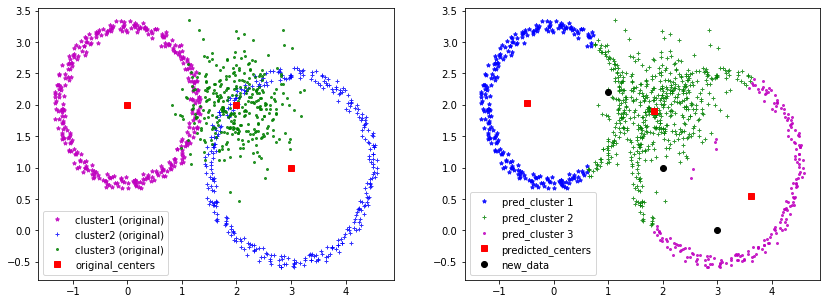

In [7]:
X1[:, 0] = 1.25*np.sin(t) + np.random.uniform(-0.1, 0.1, 333)
X1[:, 1] = 2 + 1.25*np.cos(t) + np.random.uniform(-0.1, 0.1, 333)

X2[:, 0] = 3 + 1.5*np.sin(t) + np.random.uniform(-0.1, 0.1, 333)
X2[:, 1] = 1 + 1.5*np.cos(t) + np.random.uniform(-0.1, 0.1, 333)

X3 = np.random.multivariate_normal([2, 2], [[0.25, 0], [0, 0.25]], 333)

## merge X1, X2, X3 to the data X and we will use X in the function KMeans to predict label & center
X = np.concatenate((X1, X2, X3), axis = 0)

kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000).fit(X)

## change the centers
M_real = np.array([[0, 2], [3, 1], [2, 2]])

## centers of each cluster
M_pred = kmeans.cluster_centers_
## assign the cluster using the predicted label 
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 0 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 0 (predicted cluster 3 rd)

print('original centers:')
print(M_real)
print('Centers found by scikit-learn:')
print(M_pred)

## change the new data
new_data = np.array([[1, 2.2], [2, 1], [3, 0]])
print('predict the labels of the new data-points:')
print(kmeans.predict(new_data))

plt.figure(figsize = (14, 5))
## real
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b+', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.legend()

## predicted 
plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.plot(new_data[:, 0], new_data[:, 1], 'ko', label = 'new_data')
plt.legend()

plt.show()

- We can see that when there are more `overlapped datapoints` then the predicted centers and the predicted cluster will be different from the real!
- Moreover, this is too difficult to predict the label which lies near the `intersection range` of the clusters.

**Example 4.`What happend if the dataset is the 2 `nested circle` shaped a face`**

original centers:
[[0 5]
 [6 5]
 [3 0]
 [3 3]]
Centers found by scikit-learn:
[[ 1.16276074 -0.17648444]
 [-0.77465841  5.66692282]
 [ 6.57874205  5.77800608]
 [ 4.91303682 -0.17014359]]


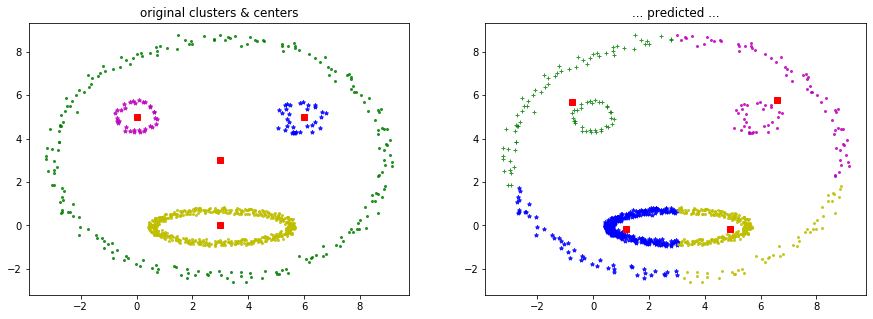

In [8]:
t = np.linspace(-np.pi, np.pi, 33)

## the left eye
X1 = np.zeros([33, 2])
X1[:, 0] = .68*np.sin(t) + np.random.uniform(-0.1, 0.1, 33)
X1[:, 1] = 5 + .7*np.cos(t) + np.random.uniform(-0.1, 0.1, 33)

# the right eye
X2 = np.zeros([33, 2])
X2[:, 0] = 6 + .65*np.sin(t) + np.random.uniform(-0.5, 0.15, 33)
X2[:, 1] = 5 + .71*np.cos(t) + np.random.uniform(-0.15, 0.05, 33)

## the whole face
t = np.linspace(-np.pi, np.pi, 222)
X3 = np.zeros([222, 2])
X3[:, 0] = 3 + 6*np.sin(t) + np.random.uniform(-0.3, 0.3, 222)
X3[:, 1] = 3 + 5.5*np.cos(t) + np.random.uniform(-0.2, 0.4, 222)

## the mouth
t = np.linspace(-np.pi, np.pi, 555)
X4 = np.zeros([555, 2])
X4[:, 0] = 3 + 2.5*np.sin(t) + np.random.uniform(-0.1, 0.2, 555)
X4[:, 1] = 0.75*np.cos(t) + np.random.uniform(-0.2, 0.1, 555)


## merge X1, X2, X3 to the data X and we will use X in the function KMeans to predict label & center
X = np.concatenate((X1, X2, X3, X4), axis = 0)

kmeans = KMeans(n_clusters = 4, random_state = 0, max_iter = 1000).fit(X)

## change the centers
M_real = np.array([[0, 5], [6, 5], [3, 0], [3, 3]])

## centers of each cluster
M_pred = kmeans.cluster_centers_
## assign the cluster using the predicted label 
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 1 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 2 (predicted cluster 3 rd)
cl4_pred = X[kmeans.predict(X) == 3]  ## Class 3 (predicted cluster 4 nd)

print('original centers:')
print(M_real)
print('Centers found by scikit-learn:')
print(M_pred)

plt.figure(figsize = (15, 5))
## real
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b*', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(X4[:, 0], X4[:, 1], 'y.', markersize = 4, alpha = .8, label = 'cluster4 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.title('original clusters & centers')

## predicted 
plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(cl4_pred[:, 0], cl4_pred[:, 1], 'y.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.title('... predicted ...')
plt.show()

- In the left panel; we have created 4 clusters be `left eye, right eye, mouth & surrounded_face` with the corresponding `centers`

- In the right panel; since the `eyes` and `mouth` is in the face; so this is too difficult to determine the `right centers`. The `Kmeans 's algorithm` in this dataset is not really good!

**Example 5.`What happend if the size of each clusters is unequal`**

original centers:
[[2.  2.5]
 [8.  3. ]
 [3.  6. ]]
Centers found by scikit-learn:
[[3.62695805 6.46554313]
 [2.26953156 5.33861755]
 [7.77960126 2.95218989]]
predict the labels of the new data-points:
[1 0 2]


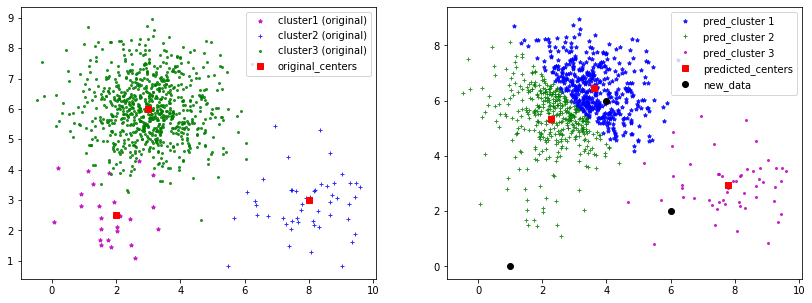

In [9]:
means = [[2, 2.5], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(means[0], cov, 25)
X2 = np.random.multivariate_normal(means[1], cov, 50)
X3 = np.random.multivariate_normal(means[2], cov, 800)
X = np.concatenate((X1, X2, X3), axis = 0)

kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000).fit(X)

## change the centers
M_real = np.array(means)

## centers of each cluster
M_pred = kmeans.cluster_centers_
## assign the cluster using the predicted label 
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 0 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 0 (predicted cluster 3 rd)

print('original centers:')
print(M_real)
print('Centers found by scikit-learn:')
print(M_pred)

## change the new data
new_data = np.array([[1, 0], [4, 6], [6, 2]])
print('predict the labels of the new data-points:')
print(kmeans.predict(new_data))

plt.figure(figsize = (14, 5))
## real
plt.subplot(121)
plt.plot(X1[:, 0], X1[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'b+', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'rs', label = 'original_centers')
plt.legend()

## predicted 
plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.plot(new_data[:, 0], new_data[:, 1], 'ko', label = 'new_data')
plt.legend()

plt.show()

When the size of each cluster is `unequal` then the prediction will be not exactly

**Example 6. Finding out the optimal number of clusters** First, we consider a simple example by using the tool `inertia`; in the Example9(in application) we will discuss a real-life problem with the Crime_dataset.

- How to choose the right number of the cluster `K`.? `Hint` : using the `inertia` to measure the distance of the datapoint to the cluster.

- Now; what is the `inertia`? It is the sum of squared distance from each point $\textbf{x}_i$ to its cluster $C_k$, defined by
$$ \sum_{i=1}^N \Vert \textbf{x}_i - C_k \Vert^2 $$

- Obviously, the smaller inertia corresponding to the tighter clusters

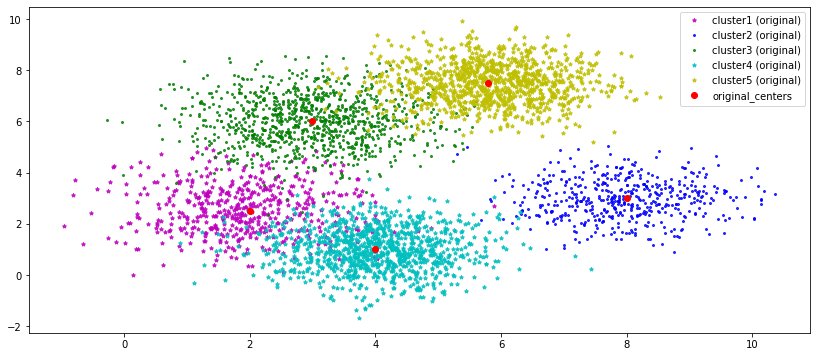

In [10]:
## create data set 
means = [[2, 2.5], [8, 3], [3, 6], [4, 1], [5.8, 7.5]]
cov1 = [[1, 0], [0, 1]]
cov2 = [[0.81, 0], [0, 0.64]]
N1, N2 = 500, 1000
X0 = np.random.multivariate_normal(means[0], cov1, N1)
X1 = np.random.multivariate_normal(means[1], cov2, N1)
X2 = np.random.multivariate_normal(means[2], cov1, N2)
X3 = np.random.multivariate_normal(means[3], cov2, N2)
X4 = np.random.multivariate_normal(means[4], cov2, N2)

M_real = np.array(means)

plt.figure(figsize = (14, 6))
## real
# plt.subplot(121)
plt.plot(X0[:, 0], X0[:, 1], 'm*', markersize = 4, alpha = .8, label = 'cluster1 (original)')
plt.plot(X1[:, 0], X1[:, 1], 'b.', markersize = 4, alpha = .8, label = 'cluster2 (original)')
plt.plot(X2[:, 0], X2[:, 1], 'g.', markersize = 4, alpha = .8, label = 'cluster3 (original)')
plt.plot(X3[:, 0], X3[:, 1], 'c*', markersize = 4, alpha = .8, label = 'cluster4 (original)')
plt.plot(X4[:, 0], X4[:, 1], 'y*', markersize = 4, alpha = .8, label = 'cluster5 (original)')
plt.plot(M_real[:, 0], M_real[:, 1], 'ro', label = 'original_centers')
plt.legend()

Text(0, 0.5, 'inertia(K)')

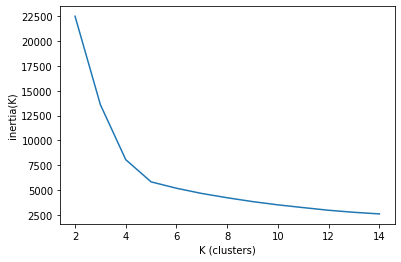

In [11]:
## Now, try to find the best inertia 
X = np.concatenate((X0, X1, X2, X3, X4), axis = 0)
inertia_list = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, random_state = 0, max_iter = 1000).fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia_list)
plt.xlabel('K (clusters)')
plt.ylabel('inertia(K)')

Since the value of `inertia` descrease with increasing `K` as long as the `cluster density` increase; and from $K = 5$, the `inertia` slope down `"slower"` than in $K \in$ {0, 4}

Hence the number of cluster `K = 4` or `K = 5` will be the `most optimial choice`.

original centers:
[[2.  2.5]
 [8.  3. ]
 [3.  6. ]
 [4.  1. ]
 [5.8 7.5]]
Centers found by scikit-learn (with K = 4):
[[3.39653439 1.33156598]
 [5.78124414 7.46371214]
 [7.88858274 2.93431242]
 [2.73926869 5.78316031]]
Centers found by scikit-learn (with K = 5):
[[5.82311843 7.4820238 ]
 [2.91076224 6.03083725]
 [7.91718616 2.95816616]
 [1.84983636 2.52637202]
 [4.07652286 0.94686022]]


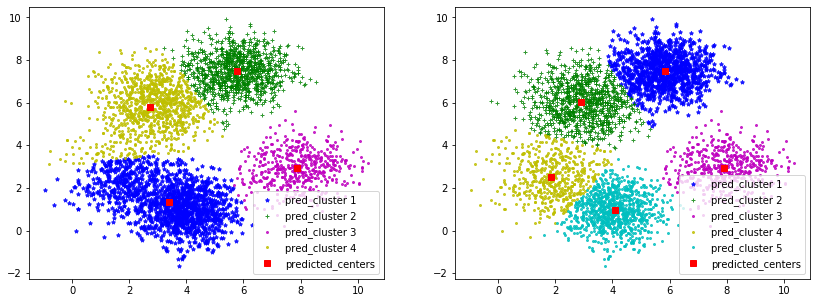

In [12]:
print('original centers:')
print(M_real)

plt.figure(figsize = (14, 5))

## plot if K = 4
kmeans = KMeans(n_clusters = 4, random_state = 0, max_iter = 1000).fit(X)
M_pred = kmeans.cluster_centers_
print('Centers found by scikit-learn (with K = 4):')
print(M_pred)
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 1 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 2 (predicted cluster 3 rd)
cl4_pred = X[kmeans.predict(X) == 3]  ## Class 3 (predicted cluster 4 nd)

plt.subplot(121)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(cl4_pred[:, 0], cl4_pred[:, 1], 'y.', markersize = 4, alpha = .8, label = 'pred_cluster 4')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.legend()


## plot if K = 5
kmeans = KMeans(n_clusters = 5, random_state = 0, max_iter = 1000).fit(X)
M_pred = kmeans.cluster_centers_
print('Centers found by scikit-learn (with K = 5):')
print(M_pred)
cl1_pred = X[kmeans.predict(X) == 0]  ## Class 0 (predicted cluster 1 st)
cl2_pred = X[kmeans.predict(X) == 1]  ## Class 1 (predicted cluster 2 nd)
cl3_pred = X[kmeans.predict(X) == 2]  ## Class 2 (predicted cluster 3 rd)
cl4_pred = X[kmeans.predict(X) == 3]  ## Class 3 (predicted cluster 4 nd)
cl5_pred = X[kmeans.predict(X) == 4]  ## Class 4 (predicted cluster 5 nd)

plt.subplot(122)
plt.plot(cl1_pred[:, 0], cl1_pred[:, 1], 'b*', markersize = 4, alpha = .8, label = 'pred_cluster 1')
plt.plot(cl2_pred[:, 0], cl2_pred[:, 1], 'g+', markersize = 4, alpha = .8, label = 'pred_cluster 2')
plt.plot(cl3_pred[:, 0], cl3_pred[:, 1], 'm.', markersize = 4, alpha = .8, label = 'pred_cluster 3')
plt.plot(cl4_pred[:, 0], cl4_pred[:, 1], 'y.', markersize = 4, alpha = .8, label = 'pred_cluster 4')
plt.plot(cl5_pred[:, 0], cl5_pred[:, 1], 'c.', markersize = 4, alpha = .8, label = 'pred_cluster 5')
plt.plot(M_pred[:, 0], M_pred[:, 1], 'rs', label = 'predicted_centers')
plt.legend()



Because we had created the dataset a `slightly overlapping` at cluster3(real) & cluster5(real) and cluster1(real) & cluster4(real) is `strongly overlapping` then this is too difficult to determine the `right number of clusters`!!

**Choosing the evaluated distance**

- `Choice of distance metric` is extremely important to clustering success.
- Each metric has strength and most approiate use-cases ... but sometimes choice of distance metric is also based on the empirical evaluation.


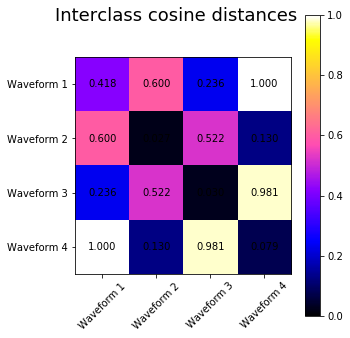

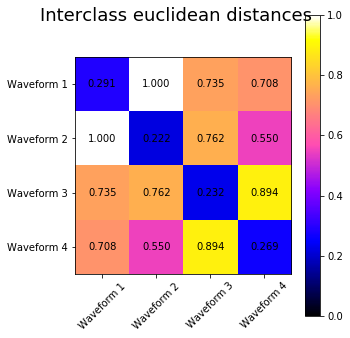

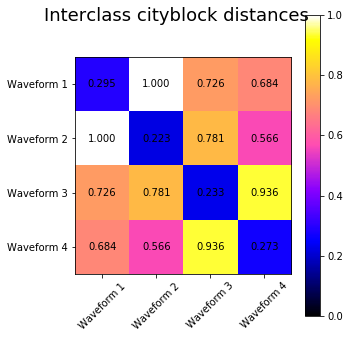

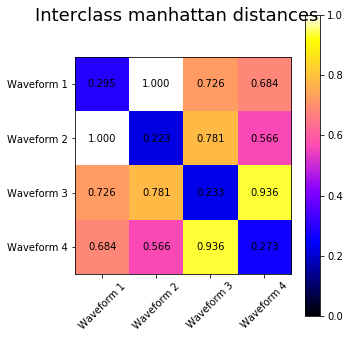

In [13]:
from sklearn.metrics import pairwise_distances

n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 0, max_iter = 1000).fit(X)
y = kmeans.predict(X)
labels = ('Waveform 1', 'Waveform 2', 'Waveform 3', 'Waveform 4')

for index, metric in enumerate(["cosine", "euclidean", "cityblock", "manhattan"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric = metric).mean()
    avg_dist /= avg_dist.max()
    
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j],
                     verticalalignment='center',
                     horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
               vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()

**Comments.**
- **`1. Cosine distance`** Let $x, y \in \mathbb{R}^d$
$$ d(x, y) = \cos(\vec{x}, \vec{y} ) = \dfrac{ \langle x , y \rangle }{\Vert x \Vert \Vert y \Vert} $$
- **`2. Euclidean distance`**
$$ d(x, y) = \Vert x - y \Vert_2 = \sqrt{\sum_{j=1}^d (x_j - y_j)^2 } $$
- **`3. Mahatan distance or cityblock distance (L1 distance)`**
$$ d(x, y) = \Vert x - y \Vert_1 = \sum_{1 \leq j \leq d} \vert x_j - y_j \vert  $$

**`Applications of KMeans in the real life`**

**`Problem 1.`** The dataset `crime_1973` is the `rate Per 100,000 and Rank by State of Crime by US States`  
- There are 9 groups of crime: `"Violent", "Property", "Murder", "Rape", "Robbery", "Assault", "Burglary", "Larceny", "Auto"`
- But here, we only focus on the four most dangerous crime categories; `'Violent', 'Murder', 'Rape', 'Assault'` and shows number of arrests in each crime type per 100,000 residents in each of the 50 states. For instance, there are about 350.1 `violent_crimes` and about 13.2 murders through 1973 in Alabama (see the first line in the below table)! 

**`Viewing the full dataset`**

In [14]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\crime_1973.xlsx")
df.head()

,State,Population,UrbanPop,Index,Violent,Property,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto
0,Alabama,3539000,58,2582.3,350.1,2232.2,13.2,21.2,79.4,236.3,897.3,1107.8,227.2
1,Alaska,330000,48,4943.3,384.5,4558.8,10.0,44.5,67.0,263.0,1167.3,2865.5,526.1
2,Arizona,2058000,80,6703.9,479.9,6224.0,8.1,31.0,147.3,293.6,1958.3,3720.1,545.6
3,Arkansas,2037000,50,2756.5,289.9,2466.6,8.8,19.5,71.5,190.0,888.0,1433.7,144.9
4,California,20601000,91,6304.9,565.8,5739.1,9.0,40.6,240.4,275.8,1979.6,3123.6,635.9


**Now, we create a new dataframe that keep only Urbanpop; the most 4 dangerous_crimes; and the total_values**
- `Total_danger_crime` : Total crimes in the most 4 dangerous_group

In [17]:
new_df = df[["State", "UrbanPop", "Violent", "Murder", "Rape", "Assault"]]
new_df["Total_danger_crime"] = new_df.iloc[:, 2:].sum(axis=1)
new_df.head()

,State,UrbanPop,Violent,Murder,Rape,Assault,Total_danger_crime
0,Alabama,58,350.1,13.2,21.2,236.3,620.8
1,Alaska,48,384.5,10.0,44.5,263.0,702.0
2,Arizona,80,479.9,8.1,31.0,293.6,812.6
3,Arkansas,50,289.9,8.8,19.5,190.0,508.2
4,California,91,565.8,9.0,40.6,275.8,891.2


Next, let's see the number of total arrests for these crimes and the number of urban population in each state.

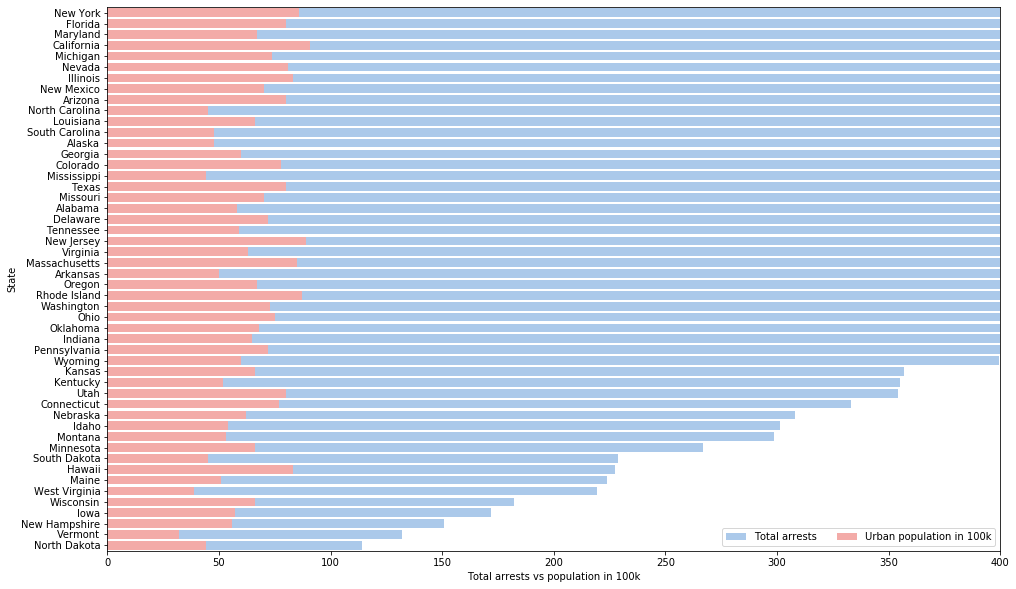

In [18]:
import seaborn as sns

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = new_df.sort_values("Total_danger_crime", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total_danger_crime", y="State", data=stats,
            label="Total arrests", color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="State", data=stats,
            label="Urban population in 100k", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 100k");

Then viewing the number of different crime types in each state.

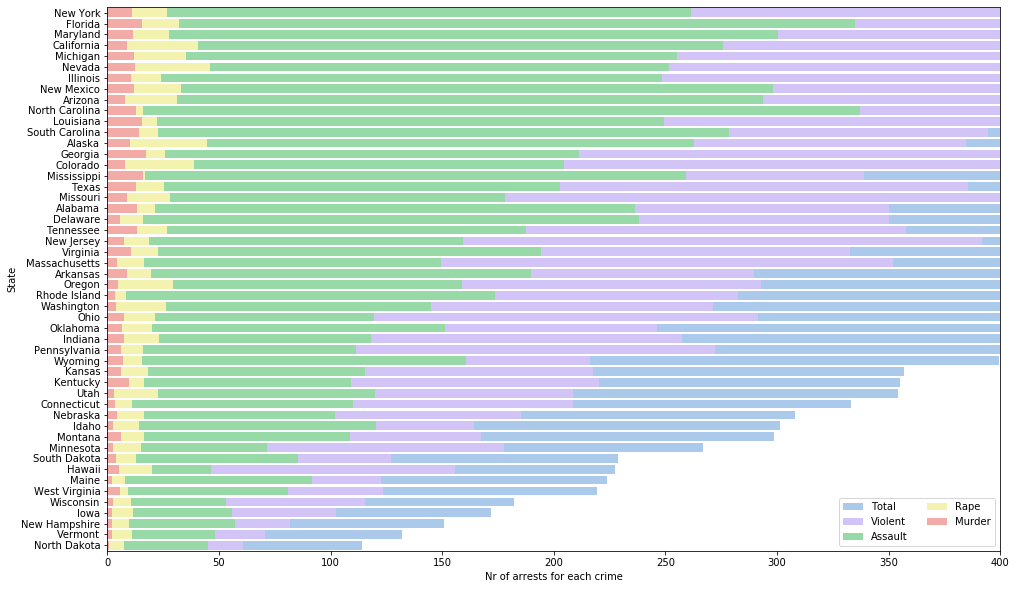

In [19]:
f, ax = plt.subplots(figsize=(16, 10))

stats = new_df.sort_values("Total_danger_crime", ascending=False)
sns.barplot(x="Total_danger_crime", y="State", data=stats,
            label="Total", color="b")
sns.barplot(x="Violent", y="State", data=stats,
            label="Violent", color="m")
sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="g")
sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")
sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

**Finding out the optimal number of clusters**

We start by using all 5 variables, excluding variable Total.

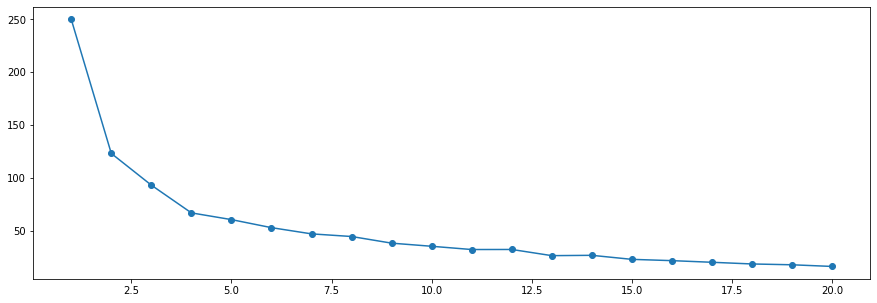

In [20]:
X = new_df[['Murder', 'Violent', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range(1, 21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize = (15, 5))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

The kinks appear to be smoothening out after four clusters indicating that the optimal number of clusters `K` = 4.

Next, we divide the data into the chosen number of clusters.

In [22]:
clusters = KMeans(4)  # 4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

new_df['Crime_clusters'] = clusters.labels_
new_df.head()

,State,UrbanPop,Violent,Murder,Rape,Assault,Total_danger_crime,Crime_clusters
0,Alabama,58,350.1,13.2,21.2,236.3,620.8,3
1,Alaska,48,384.5,10.0,44.5,263.0,702.0,3
2,Arizona,80,479.9,8.1,31.0,293.6,812.6,3
3,Arkansas,50,289.9,8.8,19.5,190.0,508.2,1
4,California,91,565.8,9.0,40.6,275.8,891.2,0


We chose not to normalize the data since it was on the "same scale" already.

Analysing the data pairwise - UrbanPop & Total

We start by looking at the two main variables until digging into separate crime types.

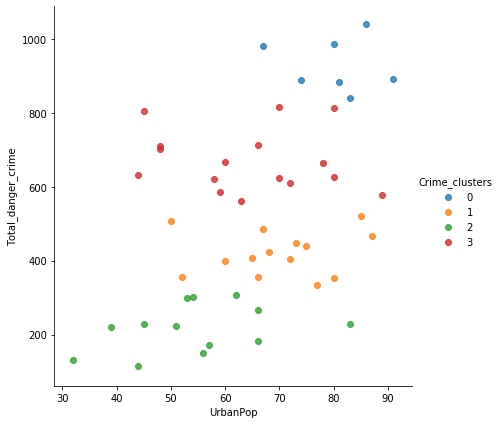

In [23]:
sns.lmplot('UrbanPop' ,'Total_danger_crime', data = new_df,
            hue = "Crime_clusters", fit_reg = False, height = 6)

- It can rather clearly be seen that the size of the urban population does not correlate with the total crime rate. In all sizes of populations there are both high and low crime rates among all four clusters.
- Analysing the data pairwise - `Murder` & `Assault`
- Next up,

Text(0, 0.5, 'rape')

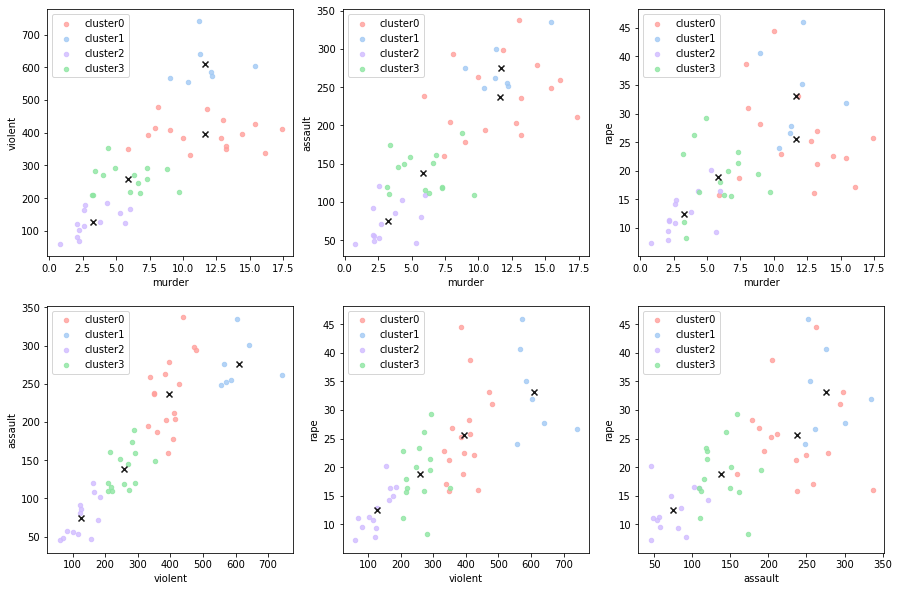

In [24]:
clusters = KMeans(4).fit(X)
centers = np.array(clusters.cluster_centers_)
colors = ['r', 'b', 'm', 'g']
label_pred = clusters.predict(X)

plt.figure(figsize = (15, 10))

##  the data pairwise - Murder & Violent
plt.subplot(231)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 0], X[label_pred == index].iloc[:, 1], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:, 0], centers[:, 1], marker="x", color='k')
plt.xlabel("murder")
plt.ylabel("violent")

## murder vs assault
plt.subplot(232)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 0], X[label_pred == index].iloc[:, 2], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:, 0], centers[:, 2], marker="x", color='k')
plt.xlabel("murder")
plt.ylabel("assault")

## murder vs rape
plt.subplot(233)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 0], X[label_pred == index].iloc[:, 3], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:,0], centers[:, 3], marker="x", color='k')
plt.xlabel("murder")
plt.ylabel("rape")

## 
plt.subplot(234)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 1], X[label_pred == index].iloc[:, 2], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:, 1], centers[:, 2], marker="x", color='k')
plt.xlabel("violent")
plt.ylabel("assault")

plt.subplot(235)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 1], X[label_pred == index].iloc[:, 3], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:, 1], centers[:, 3], marker="x", color='k')
plt.xlabel("violent")
plt.ylabel("rape")

plt.subplot(236)
for index in range(4):
    plt.scatter(X[label_pred == index].iloc[:, 2], X[label_pred == index].iloc[:, 3], marker = '.',
                 s = 80, alpha = .8, c = colors[index], label = 'cluster'+str(index))
    plt.legend()
plt.scatter(centers[:, 2], centers[:, 3], marker="x", color='k')
plt.xlabel("assault")
plt.ylabel("rape")

For instance, look at the first line; the second figure!!
- The analysing these two variables shows a clearer connection between them. Higher murder rates in a state go hand in hand with higher assault rates, and vice versa.
- The graph shows also the centers of the four clusters as x's. The clarity of the clustering is satisfactory, although some outliers remain. The three states in cluster 3 placed between 12.5 and 17.5 on the x-axis (`Georgia`, `Tennessee` and `Texas`) look more like they should belong to cluster 4. Whereas the state placed roughly on near 6.0 on the x-axis (`Delaware`), although belonging to cluster 4, looks mor like cluster 3 -material.

Moreover; we can use the `correlation table`; regarding variable correlations indicated also by the graphs. 

In [25]:
variables_correlation = new_df[['Murder', 'Assault', 'Rape', "Violent", 'UrbanPop']]
variables_correlation.corr()

,Murder,Assault,Rape,Violent,UrbanPop
Murder,1.000000,0.802894,0.564564,0.736029,0.069199
Assault,0.802894,1.000000,0.662536,0.887530,0.258848
Rape,0.564564,0.662536,1.000000,0.741779,0.411759
Violent,0.736029,0.887530,0.741779,1.000000,0.519736
UrbanPop,0.069199,0.258848,0.411759,0.519736,1.000000


For example, murder and assault have the highest correlations, whereas the size of urban population is not significant.

Finally,

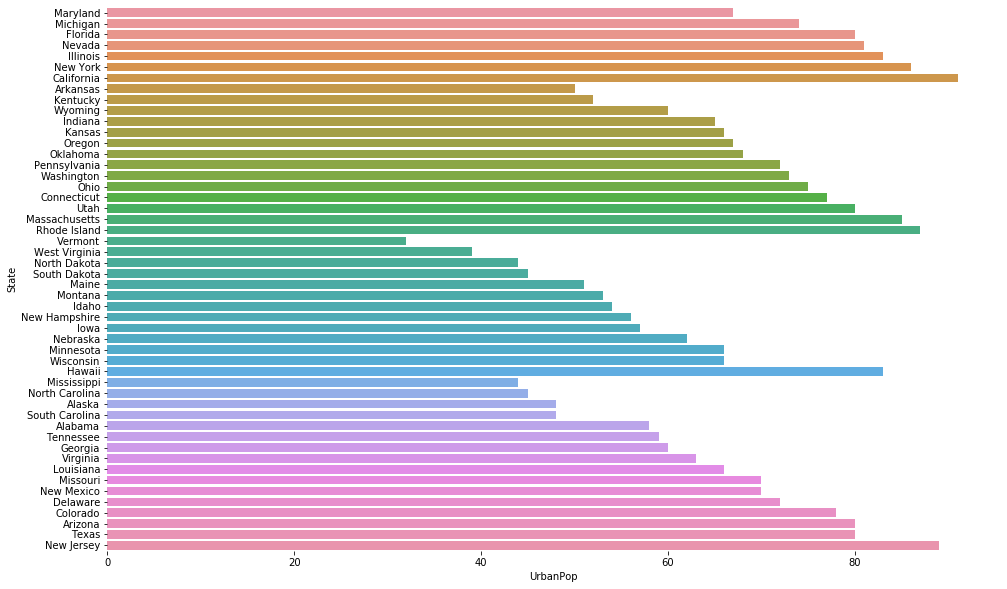

In [26]:
stats = new_df.sort_values("Total_danger_crime", ascending=True)
f, ax = plt.subplots(figsize=(16, 10))
# Load the dataset
stats = new_df.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y = "State", x = "UrbanPop", data = stats)
sns.despine(left=True, bottom=True)

- **`Cluster 1:`** `Arkansas, Tennessee,...,Rhode Island, New Jersey`
-  **`Cluster 2:`** `Vermont, West Virginia,...,Wisconsin, Hawaii`
-  **`Cluster 3:`** `Missisippi, North Carolina,...,New York, California`
-  **`Cluster 4:`** `Kentucky, Montana,...,Connecticut, Utah`

### Conclusions

- There are no clear and conclusive differences between the four clusters that could be based on the available variables. For example, a large urban population does not automatically lead to higher crime rates. `Hawaii`, for example, ranks as 6th in urban population but is 45th in the total crime rate. North Carolina, on the other hand, had the second highest crime rate but ranks only as 45th in urban population.

- Digging deeper into possible socio-economic and demograhpic causalities would require a wider set of variables, not only relating to the number of arrests in each crime type. However, there were some clear correlations between certain crime types, the investigation of which could be interesting.

**`Problem 2`. Image Compression** Each pixel in the `digital image` can be take over $256^3$ colors; it is an huge number for storing data!! To reduce their cost for storage or transmission; we can use the `clustering algorithm` to solve this problem.

First, we will load the image with `matplotlib.image.mpimg`

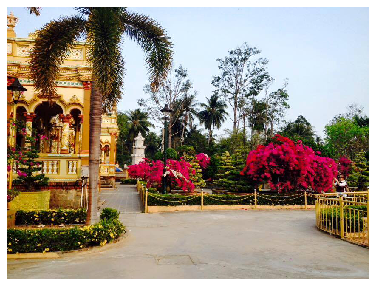

In [27]:
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\fig3.jpg")
plt.figure(figsize = (7, 5))
plt.imshow(img)
plt.axis('off')
plt.show() 

Based on the `original image`; there are some main colors corresponding with `the sky, the building, the plants, ...`

Now; we use the clusters_list = 2^n; for n = {1,2,3,4} then looking what will happen?

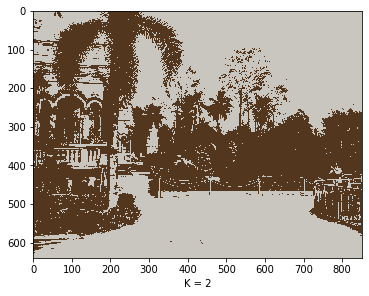

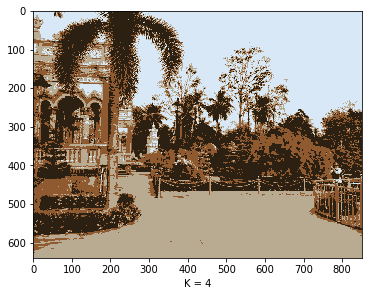

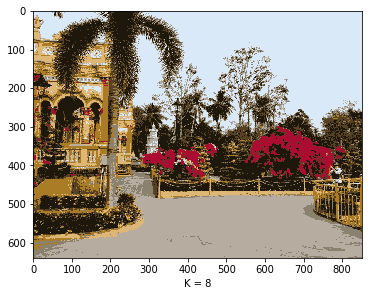

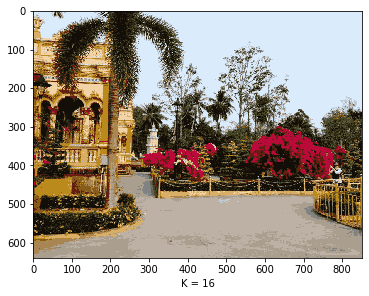

In [28]:
## Flatten the image_array
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
K_list = [2, 4, 8, 16]

## cluster the colors
for index in range(4):
    K = K_list[index]
    kmeans = KMeans(n_clusters = K).fit(X)
    label = kmeans.predict(X)
    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation = 'nearest')
    plt.xlabel('K = ' + str(K))
    plt.show()

- When `K = 2`; there are 2 main colors : black & white
- When `K = 4`, we have the cluster_colors of the sky, the ground; the building & the plants
- When `K = 8, and K = 16`, the quality of the image was improved and these cases are not larger than the original images!